In [1]:
input_path = '../world3.py'
output_path = '../models/WRLD3-03/py_world3'
vars_list_path = '../data/variables_list_types'

In [2]:
import re
w3_file = open(input_path)
w3_code = w3_file.read()

w3_code_lines = w3_code.split('\n')

func_n = -1
all_func = []
all_func_index = []
file_beginning = ""
for line_n in range(len(w3_code_lines)):
    l = w3_code_lines[line_n]
    
    if l.startswith('@cache(') or (l.startswith('def ') and line_n - last_func_decl > 1):
        func_n = func_n + 1
        last_func_decl = line_n
        all_func.append("")
    
    if(l.startswith('def ')):
        all_func_index.append(re.search('def (\w+)\(.*\):', l)[1])
    
    if func_n >= 0:
        all_func[func_n] = all_func[func_n] + l + "\n"
    else:
        file_beginning = file_beginning + l + '\n'

#print("\n".join(all_func))
#print("\n".join(all_func_index))

print(all_func_index[0])
print(all_func[all_func_index.index('consumed_industrial_output_per_capita')])


gdp_pc_unit
@cache('step')
def consumed_industrial_output_per_capita():
    """
    consumed industrial output per capita

    consumed industrial output / population

    $/(Person*year)

    (None, None)

    component

    Consumption Industrial Output per Capita (CIOPC#--)
    """
    return consumed_industrial_output() / population()





In [3]:
import os
variable_list_file = open(vars_list_path)
variable_list = variable_list_file.read().split('\n--\n')
#print(variable_list)

if not os.path.isdir(output_path):
    os.makedirs(output_path)
w3main = open(os.path.join(output_path, 'w3.py'), 'w')
w3main.write(file_beginning)
w3main.write('import os\ndir_path = os.path.dirname(os.path.abspath(__file__))\n')

directories_list = []

for group in variable_list:
    variables = group.split('\n')
    group_name = variables.pop(0)
    directory = group_name.split('.')[0]
    if directory not in directories_list:
        directories_list.append(directory)
    directory = directory + '/'
        
    print(group_name, len(variables))
    #print(variables)
    if directory != '' and not os.path.exists(os.path.join(output_path, directory)):
        os.makedirs(os.path.join(output_path, directory))
    group_path = os.path.join(directory, group_name + '.py')
    group_file = open(os.path.join(output_path, group_path), 'w')

    for v in variables:
        if v != '':
            group_file.write(all_func[all_func_index.index(v)])
    
    w3main.write('exec(compile(open(dir_path+"/' + group_path+'").read(),filename="'+group_name+'.py", mode="exec"))\n')
    group_file.close()

#for d in directories_list:
#    w3main.write('imp.load_source(' + d + ')\n')
#    init_file = open('py_world3/'+d+'/__init__.py', 'w')
#    file_list = os.listdir('py_world3/'+d)
#    if file_list.count('__init__.py') >= 1:
#        file_list.pop(file_list.index('__init__.py'))
    
#    modules_list = ", ".join(map(lambda d: "'" + d + "'", file_list))
#    init_file.write('__all__ = ['+modules_list+']')
#    init_file.close()

w3main.close()

wrld303 21
Agriculture.Loop1 24
Agriculture.Loop2 24
Agriculture.Loop3 16
Agriculture.Loop4 5
Agriculture.Loop5 4
Agriculture.Loop6 6
Agriculture.Loops1&2 7
Capital.Industry 27
Capital.Jobs 17
Capital.Service 22
Control 5
Pollution 27
Population 24
Population.Births 35
Population.Death 22
Resource 21
Supplementary 9


In [4]:
import pysd
w3model = pysd.load(os.path.join(output_path, 'w3.py'))
w3stocks = w3model.run()

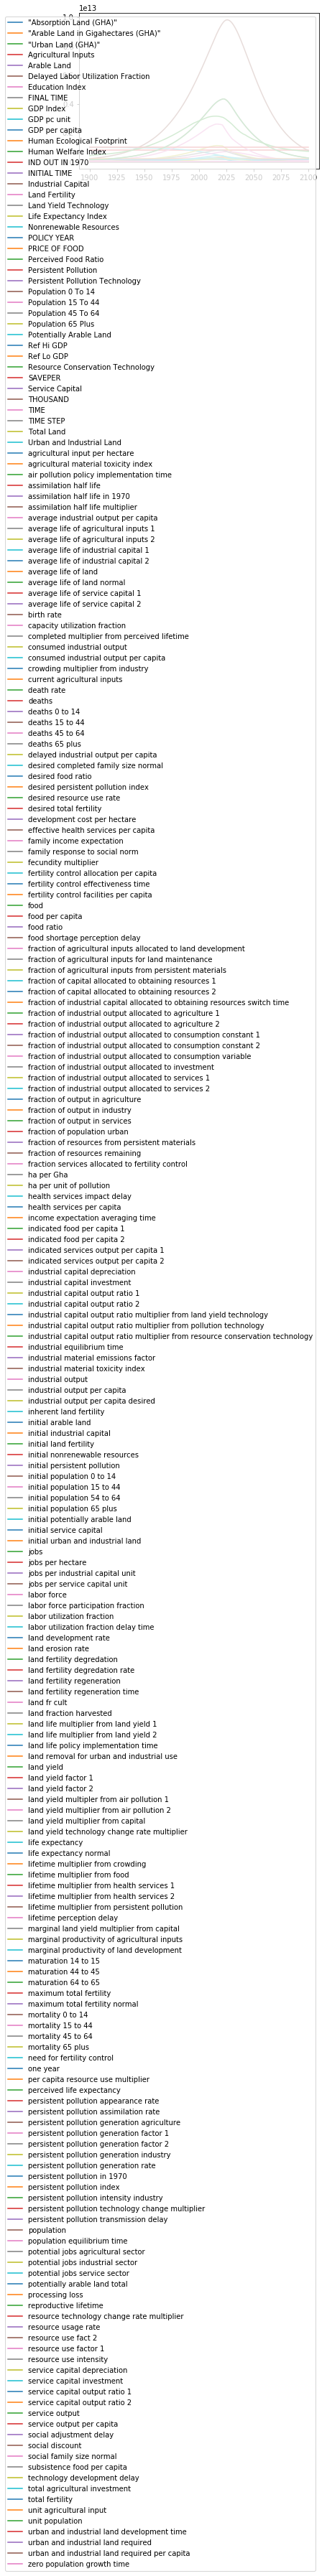

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
w3stocks.plot()
plt.show()